In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import svm
import xgboost as xgb
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings("ignore")




In [2]:

# Load dataset
df = pd.read_csv('kaggle_bot_accounts.csv')

In [3]:
# Examine the structure and content of the data
print(df.head())
print(df.info())

# Check for missing values
print(df.isna().sum())
df=df.dropna()
print(df.isna().sum())
# Examine the summary statistics
print(df.describe())


   Unnamed: 0                     NAME  GENDER                    EMAIL_ID  \
0           0        Johnny KerrThomas    Male     jacksonalan@example.com   
1           1        Dwayne LarsenLara    Male        calvin80@example.com   
2           2                      NaN    Male          qbrown@example.net   
3           3  Russell SimmonsPhillips    Male  kimberlywagner@example.com   
4           4     Jamie WilsonMartinez  Female     shaunbrooks@example.com   

  IS_GLOGIN  FOLLOWER_COUNT  FOLLOWING_COUNT  DATASET_COUNT  CODE_COUNT  \
0     False            53.0             87.0            5.0         3.0   
1      True            16.0             67.0            5.0         NaN   
2      True            44.0             81.0            4.0        17.0   
3      True            23.0            114.0            5.0        24.0   
4     False            46.0            112.0            2.0        12.0   

   DISCUSSION_COUNT  AVG_NB_READ_TIME_MIN REGISTRATION_IPV4  \
0             124

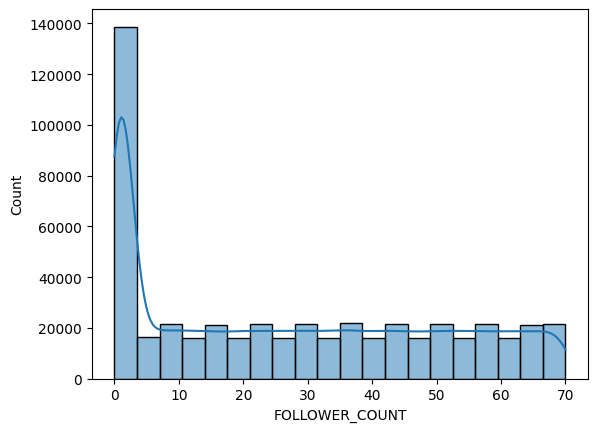

In [4]:
sns.histplot(df['FOLLOWER_COUNT'], bins=20, kde=True)
plt.show()

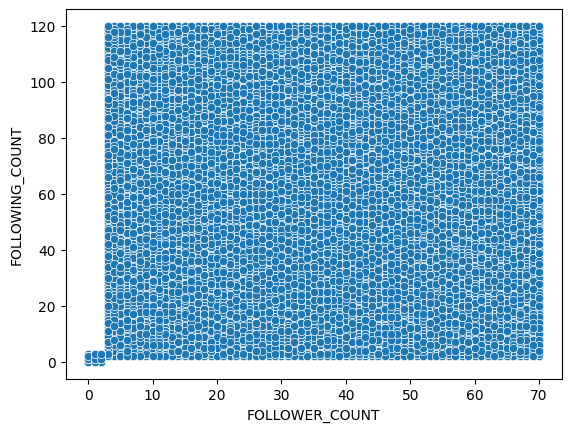

In [5]:
sns.scatterplot(x='FOLLOWER_COUNT', y='FOLLOWING_COUNT', data=df)
plt.show()

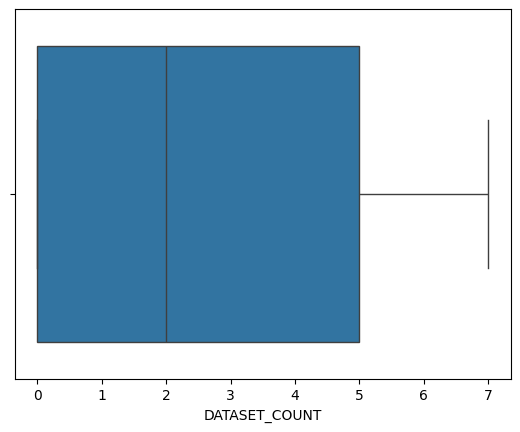

In [6]:
sns.boxplot(x='DATASET_COUNT', data=df)
plt.show()

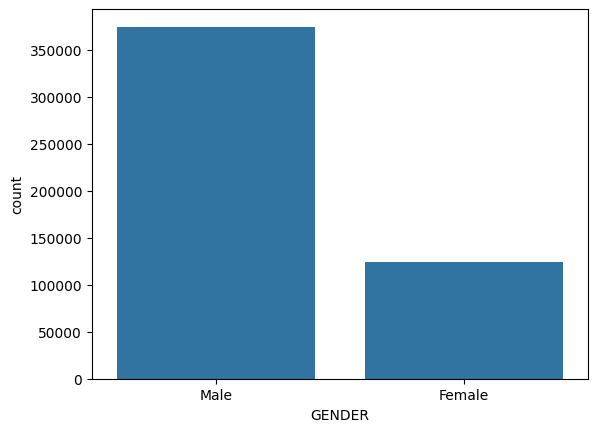

In [7]:
sns.countplot(x='GENDER', data=df)
plt.show()

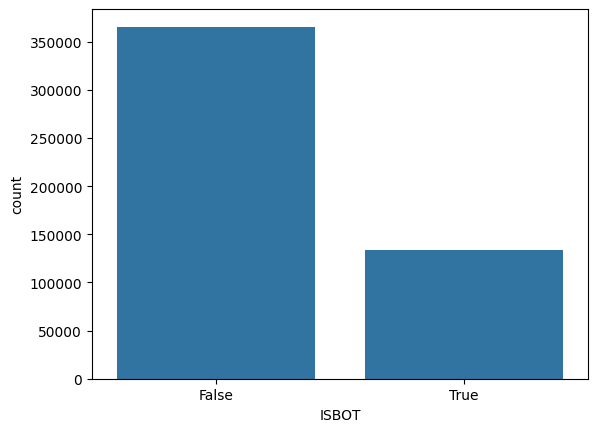

In [8]:
sns.countplot(x='ISBOT', data=df)
plt.show()

In [9]:
#df['GENDER'] = df['GENDER'].replace({'Male': 1, 'Female': 0})
df['ISBOT'] = df['ISBOT'].replace({True: 1, False: 0})
df = df.drop(columns = ['Unnamed: 0', 'NAME', 'GENDER', 'EMAIL_ID', 'REGISTRATION_IPV4', 'REGISTRATION_LOCATION'])

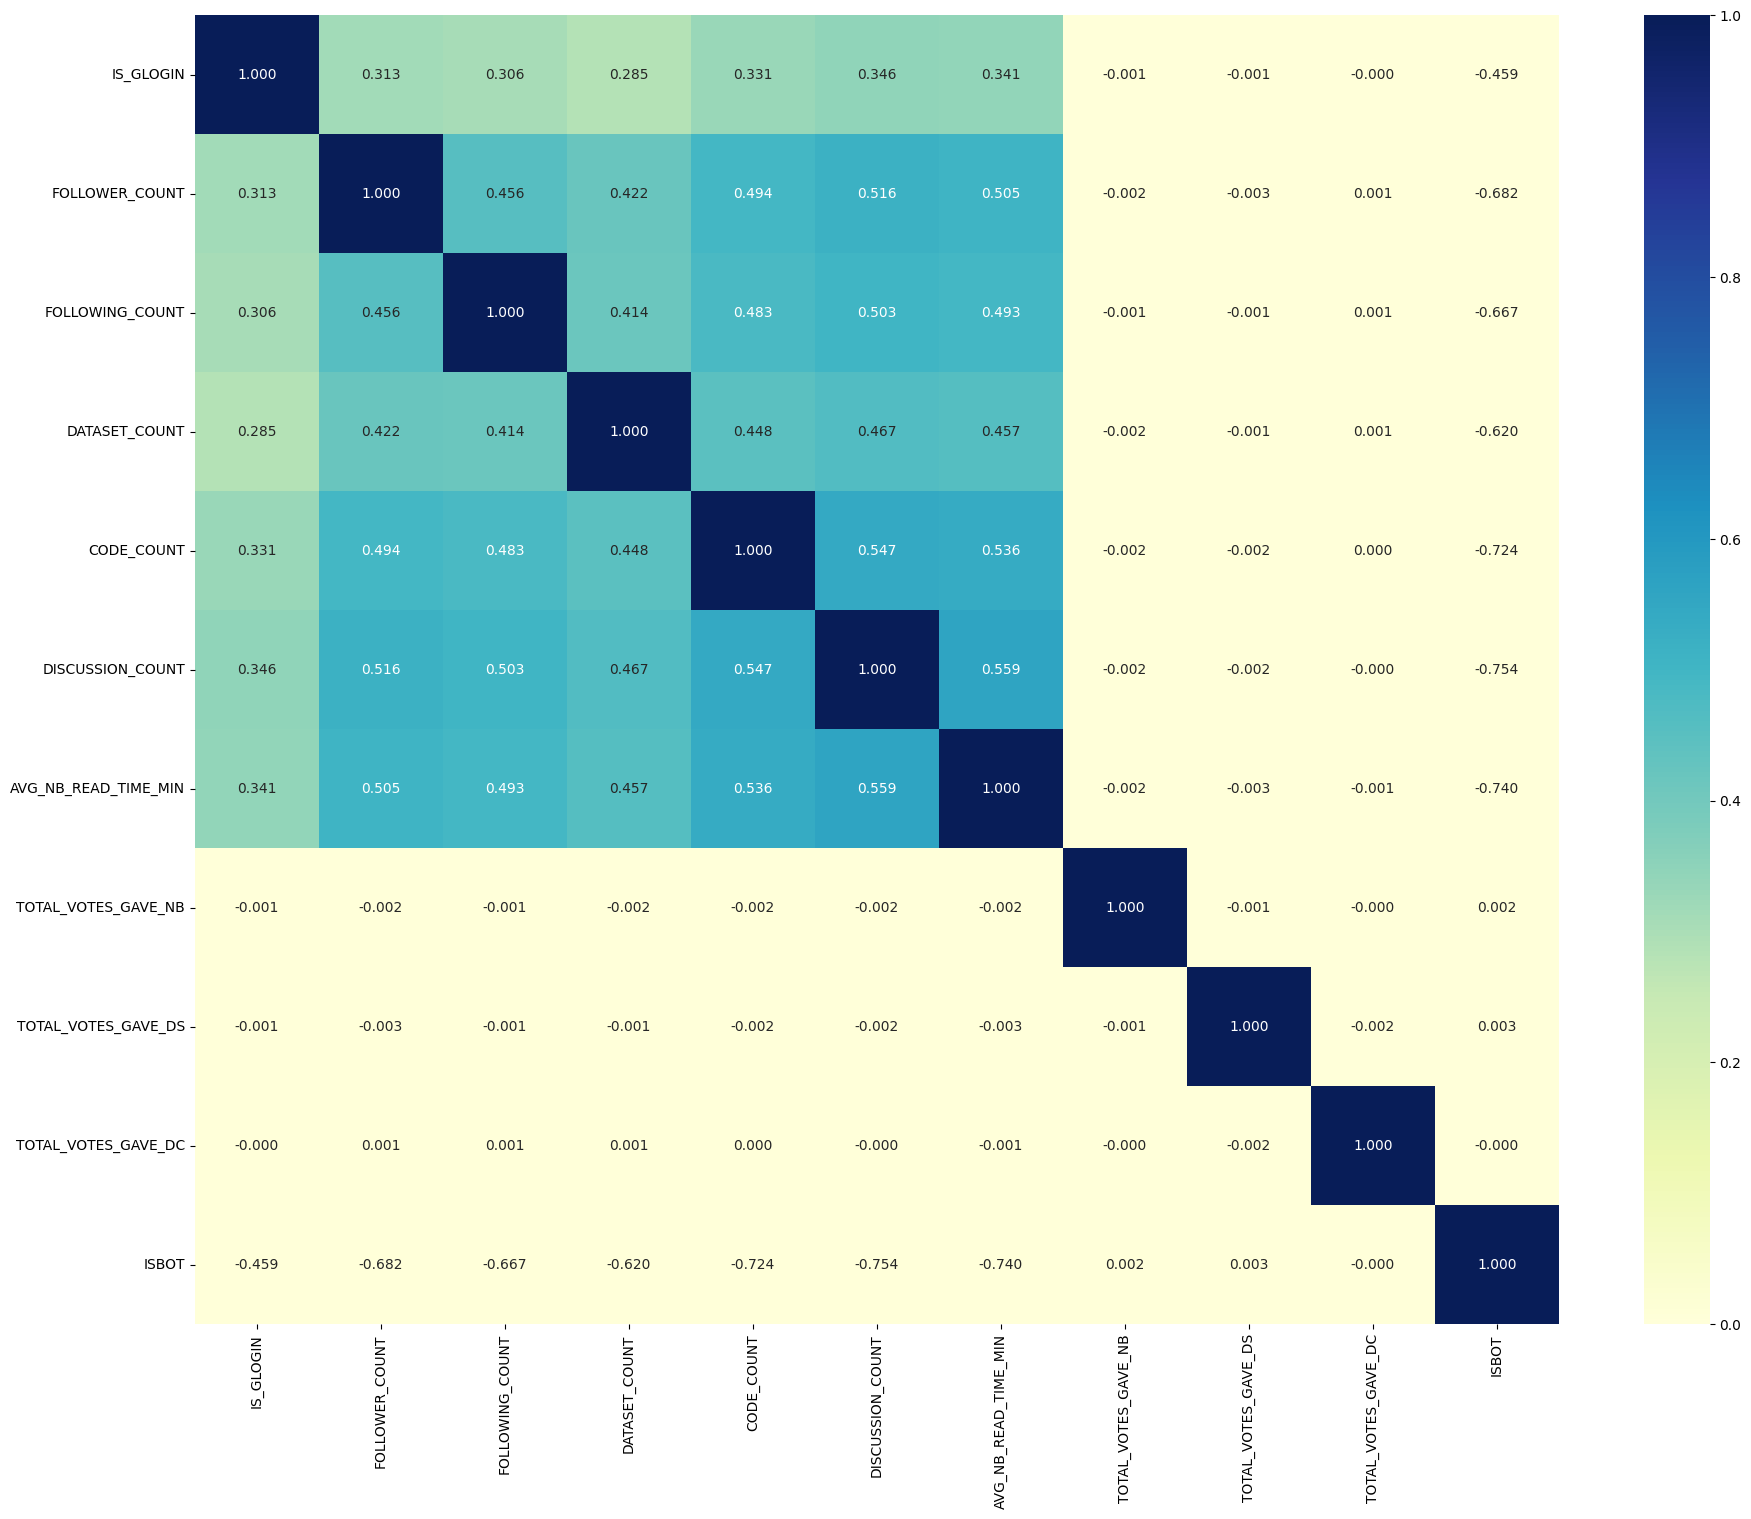

In [10]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(22, 17)) 
sns.heatmap(corr_matrix, cmap="YlGnBu",annot = True,fmt='.3f',vmin=0, vmax=1)

# Show the plot
plt.show()


In [11]:
X = df.drop(columns = 'ISBOT')
#X = df[[ 'FOLLOWING_COUNT','CODE_COUNT', 'DISCUSSION_COUNT', 'AVG_NB_READ_TIME_MIN']]
#y = df[['ISBOT']]
y = df['ISBOT']

scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
scaler.transform(X)

# split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=128)

In [12]:
# instantiate the KNeighborsClassifier with n_neighbors=5
knn = KNeighborsClassifier(n_neighbors=5)

# fit the model with training data
knn.fit(X_train, y_train)

# make predictions on test data
y_pred_knn = knn.predict(X_test)

# calculate the accuracy score of the model
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("Accuracy:", accuracy_knn)

# calculate classification report
report = classification_report(y_test, y_pred_knn)
print("\n \t Classification Report - KNN\n")
print(report)

Accuracy: 0.9999899797591134

 	 Classification Report - KNN

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73217
           1       1.00      1.00      1.00     26581

    accuracy                           1.00     99798
   macro avg       1.00      1.00      1.00     99798
weighted avg       1.00      1.00      1.00     99798



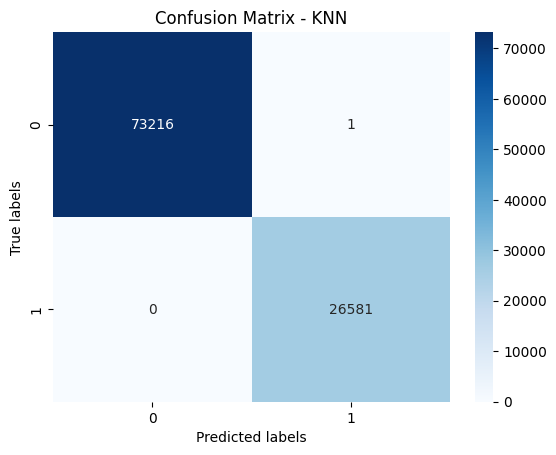

In [13]:
import seaborn as sns

# create confusion matrix
cm = confusion_matrix(y_test, y_pred_knn)

# create heatmap of confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')

# set axis labels and title
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - KNN')

# show the plot
plt.show()


In [14]:
clf = svm.SVC(kernel='linear')

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_svm = clf.predict(X_test)

# Calculate the accuracy of the predictions
accuracy_svm = accuracy_score(y_test, y_pred_svm)

# Print the accuracy
print('SVM accuracy:', accuracy_svm)

report = classification_report(y_test, y_pred_svm)

# print the report
print("\n \t Classification Report - Support Vector Machine\n")
print(report)

SVM accuracy: 1.0

 	 Classification Report - Support Vector Machine

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73217
           1       1.00      1.00      1.00     26581

    accuracy                           1.00     99798
   macro avg       1.00      1.00      1.00     99798
weighted avg       1.00      1.00      1.00     99798



Text(0.5, 1.0, 'Confusion Matrix - Support Vector Machines')

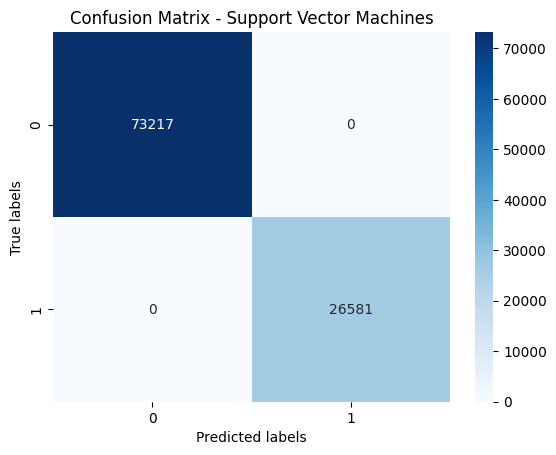

In [15]:
cm = confusion_matrix(y_test, y_pred_svm)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Support Vector Machines')

In [16]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Fit the classifier to the training data
nb_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_nb = nb_classifier.predict(X_test)

# Print the accuracy score
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("Naive Bayes accuracy:", accuracy_nb)

# calculate classification report
report = classification_report(y_test, y_pred_nb)
print("\n \t Classification Report - Naive Bayes\n")
print(report)

Naive Bayes accuracy: 1.0

 	 Classification Report - Naive Bayes

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     73217
           1       1.00      1.00      1.00     26581

    accuracy                           1.00     99798
   macro avg       1.00      1.00      1.00     99798
weighted avg       1.00      1.00      1.00     99798



Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

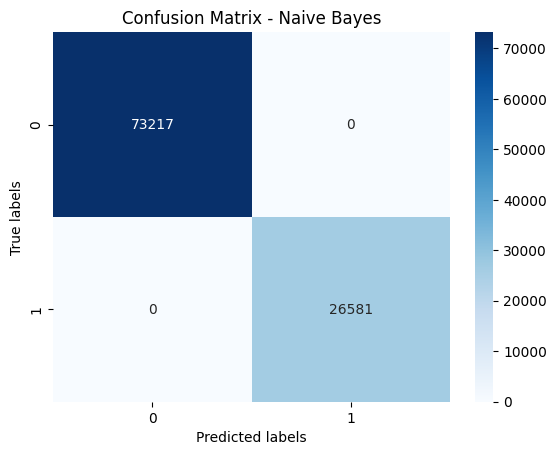

In [17]:
cm = confusion_matrix(y_test, y_pred_nb)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Naive Bayes')

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=64)
# Define the XGBoost parameters
params = {
    'objective': 'binary:logistic',
    'eval_metric': 'error',
    'max_depth': 5
}

# Convert the training data to a DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)

# Train the XGBoost model
xgb_classifier = xgb.train(params, dtrain)

# Predict on the test data
dtest = xgb.DMatrix(X_test)
y_pred_xgb = xgb_classifier.predict(dtest)

# Convert probabilities to binary labels
y_pred_xgb = [1 if p >= 0.5 else 0 for p in y_pred_xgb]

# Compute the accuracy score
accuracy_xgd = accuracy_score(y_test, y_pred_xgb)
print("XGBoost accuracy:", accuracy_xgd)

report = classification_report(y_test, y_pred_xgb)
print("\n \t Classification Report - XGB Boosting\n")
print(report)


XGBoost accuracy: 1.0

 	 Classification Report - XGB Boosting

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146461
           1       1.00      1.00      1.00     53134

    accuracy                           1.00    199595
   macro avg       1.00      1.00      1.00    199595
weighted avg       1.00      1.00      1.00    199595



Text(0.5, 1.0, 'Confusion Matrix - XGB Boosting')

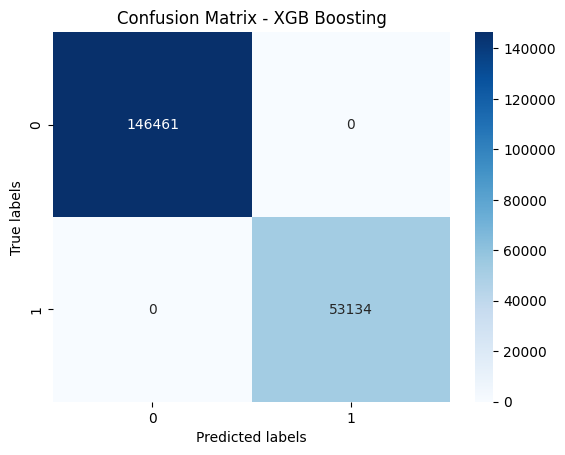

In [19]:
cm = confusion_matrix(y_test, y_pred_xgb)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - XGB Boosting')

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
# Create a Random Forest classifier with 100 trees
rf_classifier = RandomForestClassifier(n_estimators=100)

# Fit the classifier to the training data
rf_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_rf = rf_classifier.predict(X_test)

# Print the accuracy score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy:", accuracy_rf)

report = classification_report(y_test, y_pred_rf)

# print the report
print("\n \t Classification Report - Random Forest\n")
print(report)

Random Forest accuracy: 1.0

 	 Classification Report - Random Forest

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146431
           1       1.00      1.00      1.00     53164

    accuracy                           1.00    199595
   macro avg       1.00      1.00      1.00    199595
weighted avg       1.00      1.00      1.00    199595



Text(0.5, 1.0, 'Confusion Matrix - Random Forest Classifier')

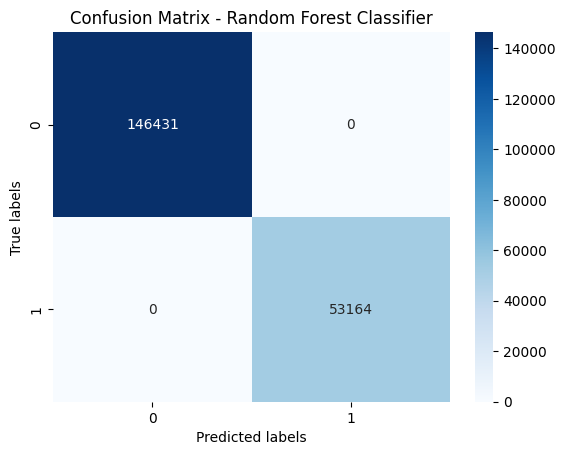

In [21]:
cm = confusion_matrix(y_test, y_pred_rf)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Random Forest Classifier')

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=6)
# Create a Decision Tree classifier
dt_classifier = DecisionTreeClassifier()

# Fit the classifier to the training data
dt_classifier.fit(X_train, y_train)

# Predict on the test data
y_pred_dt = dt_classifier.predict(X_test)

# Print the accuracy score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree accuracy:", accuracy_dt)
report = classification_report(y_test, y_pred_dt)

# print the report
print("\n \t Classification Report - Decision Tree\n")
print(report)

Decision Tree accuracy: 1.0

 	 Classification Report - Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    146171
           1       1.00      1.00      1.00     53424

    accuracy                           1.00    199595
   macro avg       1.00      1.00      1.00    199595
weighted avg       1.00      1.00      1.00    199595



Text(0.5, 1.0, 'Confusion Matrix - Decision Tree Classifier')

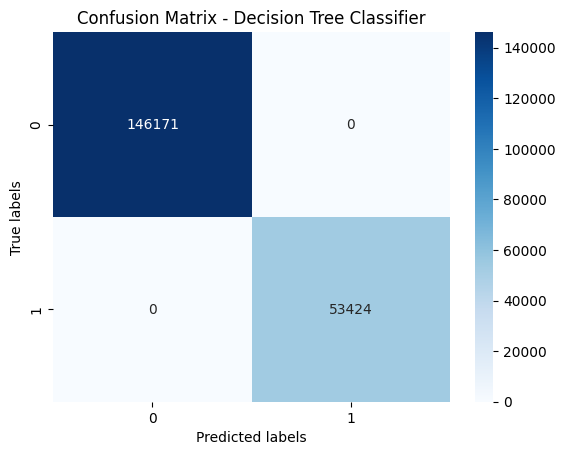

In [23]:
cm = confusion_matrix(y_test, y_pred_dt)

# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Decision Tree Classifier')

In [29]:
# import necessary libraries
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam


# assume you have a dataset X and corresponding labels y
# split the dataset into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# split the train set further into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.25, random_state=42)


# create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# compile the model
adam = Adam(lr=0.0001)
model.compile(loss='mae', optimizer=adam, metrics=['accuracy'])

# train the model
history = model.fit(X_train, y_train, epochs=25, batch_size=1024, validation_data=(X_valid, y_valid), verbose=1)

# evaluate the model on the test set
loss, accuracy_nn = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy_nn)

!pip install Tensorflow

ModuleNotFoundError: No module named 'keras'

In [ ]:
y_pred_nn = model.predict(X_test)
y_pred_nn = (y_pred_nn > 0.5).astype(int) # convert probabilities to binary labels
cm = confusion_matrix(y_test, y_pred_nn)


# Create a heatmap using seaborn
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels and title to the plot
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix - Neural Network')

In [ ]:
report = classification_report(y_test, y_pred_nn)

# print the report
print("\n \t Classification Report - Neural Network\n")
print(report)


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# sample data for accuracy values
accuracy_values = [accuracy_knn, accuracy_svm, accuracy_nb, accuracy_xgd, accuracy_rf, accuracy_dt, accuracy_nn]

# x-axis labels
models = ['KNN','SVM','NB','XGB','RF','DT','NN']

# create a bar plot
x = np.arange(len(models))
plt.bar(x, accuracy_values)

# add labels and title
plt.xticks(x, models)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison for Seven Models')

plt.show()


In [ ]:
for i in range(7):
  print (models[i],accuracy_values[i])

In [ ]:
!pip install Tensorflow



[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip
